In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [3]:
gpuFolder = 'hpc-exam-section2/gpu-results'
thinFolder = 'hpc-exam-section2/thin-results'

In [4]:
def getFilenames(folderPath, extension='csv'):
    return [f for f in os.listdir(folderPath) if f.endswith('.'+extension)]

def SCM(x, BandwidthInverse, lambdaConstant):
    return BandwidthInverse * x + lambdaConstant

In [5]:
def plotAndSave(folderPath, filenames, saveFolder):
    for i in range(len(filenames)):
        filename = filenames[i]
        df = pd.read_csv(folderPath+'/'+filename)
        filename = filename[:-4]

        nBytes = df['#bytes'].to_numpy()
        t = df['t[usec]'].to_numpy()
        v = df['Mbytes/sec'].to_numpy()

#         fig = plt.figure(figsize=(10,7))
#         plt.title('Latency', fontsize=20)
#         plt.plot(nBytes, t, 'b', alpha=0.2)
#         plt.plot(nBytes, t, 'ro')
#         plt.xlabel('Byte', fontsize=16)
#         plt.ylabel('t [usec]', fontsize=16)
#         plt.xticks(fontsize=14)
#         plt.yticks(fontsize=14)
#         # plt.xscale('log')
#         plt.savefig(saveFolder + '/' +filename+'__t.png' ,dpi=300)
#         plt.close(fig)


        fig = plt.figure(figsize=(10,7))
        plt.title('Time', fontsize=20)
#         plt.plot(nBytes, t, 'b', alpha=0.2)
        plt.plot(nBytes, t, 'ro', label='Emperical Data')
        plt.xlabel('Byte', fontsize=16)
        plt.ylabel('t [usec]', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xscale('log')
        
        params, covs = curve_fit(SCM, nBytes, t)
        fittedT = SCM(nBytes, params[0], params[1])
        plt.plot(nBytes, fittedT, 'k', 
                 label='Fitted Curve: $t=\\frac{{1}}{{{:4d}}}\\times $#$Bytes{:+0.02f}$'.format(int(1/params[0]), params[1]))
        plt.legend(fontsize=14)
        plt.savefig(saveFolder + '/' +filename+'__t-log.png', dpi=300)
        plt.close(fig)
        redefinedfittedT = SCM(nBytes, params[0], np.min(t))
        df['t[usec] computed'] = redefinedfittedT
        df.to_csv(saveFolder + '/' +filename+'__t-computed.csv')
        

        fig = plt.figure(figsize=(10,7))
        plt.title('Bandwidth', fontsize=20)
        plt.plot(nBytes, v, 'b', alpha=0.2)
        plt.plot(nBytes, v, 'ro')
        plt.xlabel('Byte', fontsize=16)
        plt.ylabel('BW [Mbytes/sec]', fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xscale('log')

        plt.savefig(saveFolder + '/' +filename+'__bandwidth.png' ,dpi=300)
        plt.close(fig)

        print(filename, 'is done!')

In [261]:
gpuFiles = getFilenames(gpuFolder)
saveFolder = 'gpu-results-plot'
if not os.path.exists(saveFolder):
    os.makedirs(saveFolder)
    
plotAndSave(gpuFolder, gpuFiles, saveFolder)

result_core_ob1_tcp_br0 is done!
result_core_ob1_tcp_ib0 is done!
result_core_ob1_vader is done!
result_core_ofi_mlx_intel is done!
result_core_ofi_sockets_intel is done!
result_core_ofi_tcp_intel is done!
result_core_shm_intel is done!
result_core_ucx is done!
result_node_ob1_tcp_br0 is done!
result_node_ob1_tcp_ib0 is done!
result_node_ofi_mlx_intel is done!
result_node_ofi_sockets_intel is done!
result_node_ofi_tcp_intel is done!
result_node_ucx_tcp_ib0 is done!
result_socket_ob1_tcp_br0 is done!
result_socket_ob1_tcp_ib0 is done!
result_socket_ob1_vader is done!
result_socket_ofi_mlx_intel is done!
result_socket_ofi_sockets_intel is done!
result_socket_ofi_tcp_intel is done!
result_socket_shm_intel is done!
result_socket_ucx is done!


In [262]:
thinFiles = getFilenames(thinFolder)
saveFolder = 'thin-results-plot'
if not os.path.exists(saveFolder):
    os.makedirs(saveFolder)

plotAndSave(thinFolder, thinFiles, saveFolder)

result_core_ob1_tcp_br0 is done!
result_core_ob1_tcp_ib0 is done!
result_core_ob1_vader is done!
result_core_ofi_mlx_intel is done!
result_core_ofi_sockets_intel is done!
result_core_ofi_tcp_intel is done!
result_core_shm_intel is done!
result_core_ucx is done!
result_node_ob1_tcp_br0 is done!
result_node_ob1_tcp_ib0 is done!
result_node_ofi_mlx_intel is done!
result_node_ofi_sockets_intel is done!
result_node_ofi_tcp_intel is done!
result_node_ucx_tcp_ib0 is done!
result_socket_ob1_tcp_br0 is done!
result_socket_ob1_tcp_ib0 is done!
result_socket_ob1_vader is done!
result_socket_ofi_mlx_intel is done!
result_socket_ofi_sockets_intel is done!
result_socket_ofi_tcp_intel is done!
result_socket_shm_intel is done!
result_socket_ucx is done!


## Example

In [6]:
gpuFiles = getFilenames(gpuFolder)

### Positive Estimated Latency

In [7]:
gpuFiles[5]

'result_core_ofi_tcp_intel.csv'

In [8]:
df = pd.read_csv(gpuFolder+'/'+gpuFiles[5])

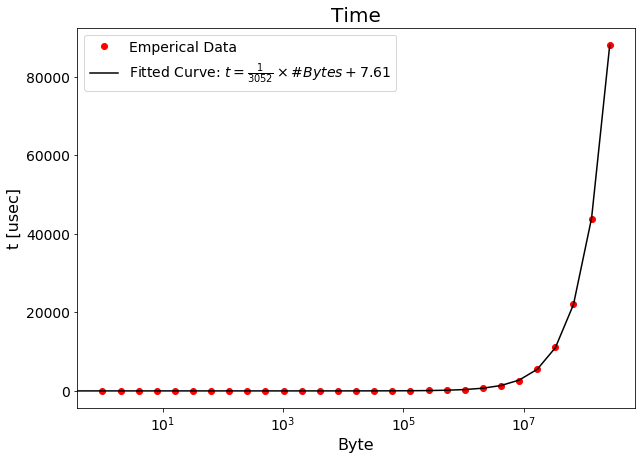

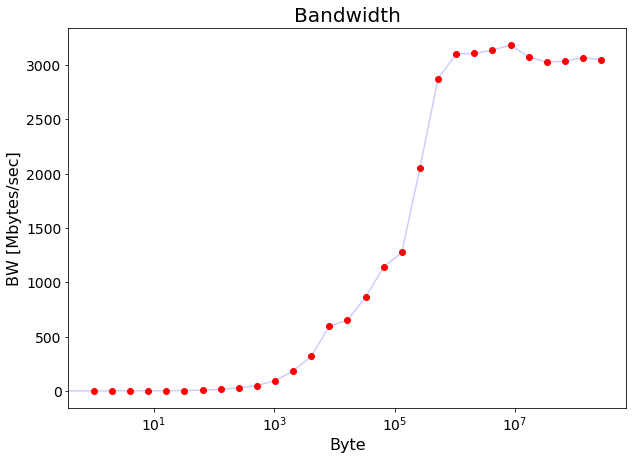

In [13]:
nBytes = df['#bytes'].to_numpy()
t = df['t[usec]'].to_numpy()
v = df['Mbytes/sec'].to_numpy()

plt.figure(figsize=(10,7))
plt.title('Time', fontsize=20)
# plt.plot(nBytes, t, 'b', alpha=0.2)
plt.plot(nBytes, t, 'ro', label='Emperical Data')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('t [usec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
# plt.yscale('log')

params, covs = curve_fit(SCM, nBytes, t)
fittedT = SCM(nBytes, params[0], params[1])
plt.plot(nBytes, fittedT, 'k', label='Fitted Curve: $t=\\frac{{1}}{{{:4d}}}\\times $#$Bytes{:+0.02f}$'.format(int(1/params[0]), params[1]))
plt.legend(fontsize=14)
df['t[usec] computed'] = fittedT


plt.figure(figsize=(10,7))
plt.title('Bandwidth', fontsize=20)
plt.plot(nBytes, v, 'b', alpha=0.2)
plt.plot(nBytes, v, 'ro')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('BW [Mbytes/sec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
# plt.yscale('log')

plt.savefig('rate-lambda_rod_1.png' ,dpi=300)

### log-log plots

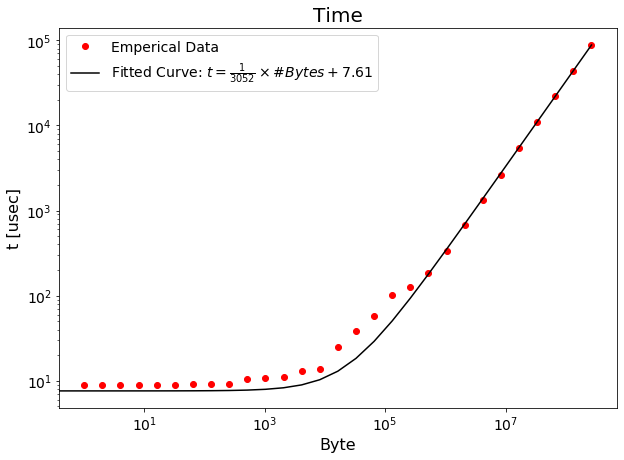

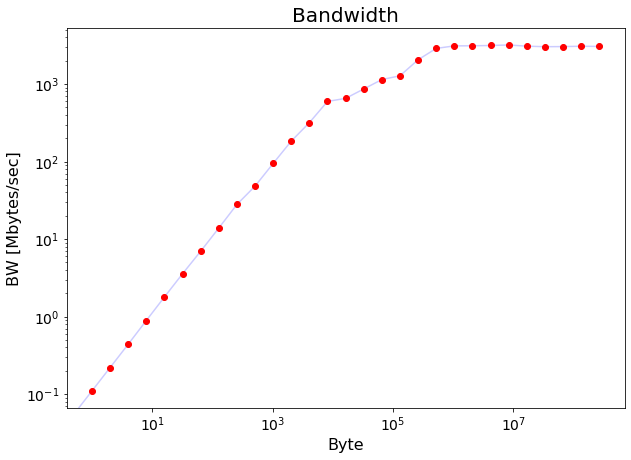

In [14]:

plt.figure(figsize=(10,7))
plt.title('Time', fontsize=20)
# plt.plot(nBytes, t, 'b', alpha=0.2)
plt.plot(nBytes, t, 'ro', label='Emperical Data')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('t [usec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')

params, covs = curve_fit(SCM, nBytes, t)
fittedT = SCM(nBytes, params[0], params[1])
plt.plot(nBytes, fittedT, 'k', label='Fitted Curve: $t=\\frac{{1}}{{{:4d}}}\\times $#$Bytes{:+0.02f}$'.format(int(1/params[0]), params[1]))
plt.legend(fontsize=14)
df['t[usec] computed'] = fittedT


plt.figure(figsize=(10,7))
plt.title('Bandwidth', fontsize=20)
plt.plot(nBytes, v, 'b', alpha=0.2)
plt.plot(nBytes, v, 'ro')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('BW [Mbytes/sec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')

plt.savefig('rate-lambda_rod_1.png' ,dpi=300)

In [6]:
gpuFiles = getFilenames(gpuFolder)

### Negative Estimated Latency

In [20]:
gpuFiles[2]

'result_core_ob1_vader.csv'

In [21]:
df = pd.read_csv(gpuFolder+'/'+gpuFiles[2])

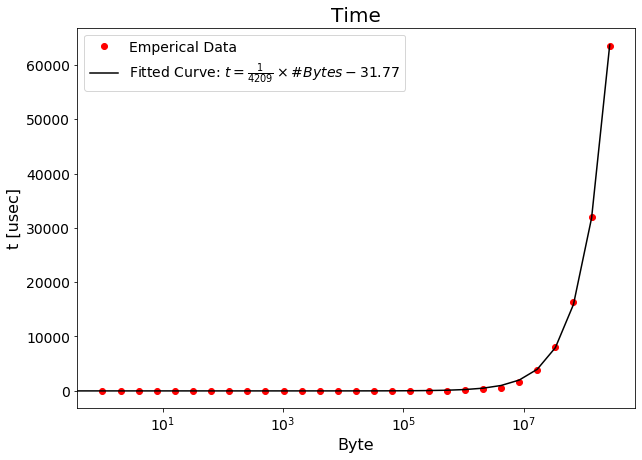

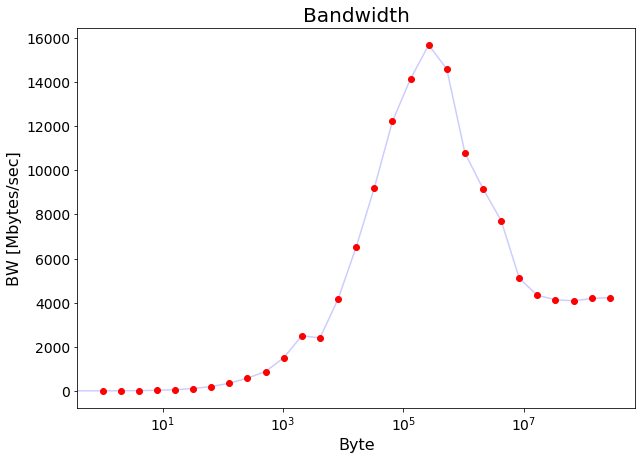

In [22]:
nBytes = df['#bytes'].to_numpy()
t = df['t[usec]'].to_numpy()
v = df['Mbytes/sec'].to_numpy()

plt.figure(figsize=(10,7))
plt.title('Time', fontsize=20)
# plt.plot(nBytes, t, 'b', alpha=0.2)
plt.plot(nBytes, t, 'ro', label='Emperical Data')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('t [usec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
# plt.yscale('log')

params, covs = curve_fit(SCM, nBytes, t)
fittedT = SCM(nBytes, params[0], params[1])
plt.plot(nBytes, fittedT, 'k', label='Fitted Curve: $t=\\frac{{1}}{{{:4d}}}\\times $#$Bytes{:+0.02f}$'.format(int(1/params[0]), params[1]))
plt.legend(fontsize=14)
df['t[usec] computed'] = fittedT


plt.figure(figsize=(10,7))
plt.title('Bandwidth', fontsize=20)
plt.plot(nBytes, v, 'b', alpha=0.2)
plt.plot(nBytes, v, 'ro')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('BW [Mbytes/sec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
# plt.yscale('log')

plt.savefig('rate-lambda_rod_1.png' ,dpi=300)

### log-log plots

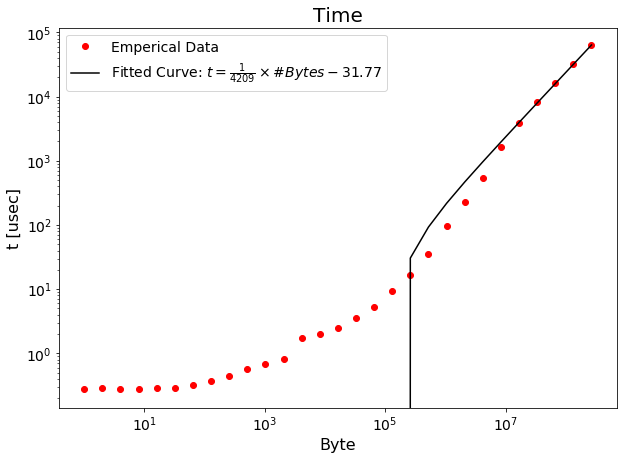

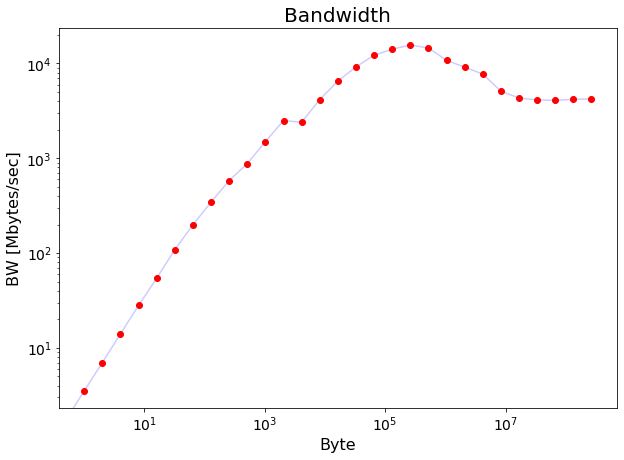

In [23]:

plt.figure(figsize=(10,7))
plt.title('Time', fontsize=20)
# plt.plot(nBytes, t, 'b', alpha=0.2)
plt.plot(nBytes, t, 'ro', label='Emperical Data')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('t [usec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')

params, covs = curve_fit(SCM, nBytes, t)
fittedT = SCM(nBytes, params[0], params[1])
plt.plot(nBytes, fittedT, 'k', label='Fitted Curve: $t=\\frac{{1}}{{{:4d}}}\\times $#$Bytes{:+0.02f}$'.format(int(1/params[0]), params[1]))
plt.legend(fontsize=14)
df['t[usec] computed'] = fittedT


plt.figure(figsize=(10,7))
plt.title('Bandwidth', fontsize=20)
plt.plot(nBytes, v, 'b', alpha=0.2)
plt.plot(nBytes, v, 'ro')
plt.xlabel('Byte', fontsize=16)
plt.ylabel('BW [Mbytes/sec]', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')

plt.savefig('rate-lambda_rod_1.png' ,dpi=300)